<a href="https://colab.research.google.com/github/ravilladivyaUNT/Divya_INFO5731_-Spring2022/blob/main/In_Class_exercise_04_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

packages used in this TASK are re, gensim, spacy and pyLDAvis. Besides this we will also using matplotlib, numpy and pandas for data handling and visualization. Let’s import them.

In [9]:
# Write your code here
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyldavis
import pyLDAvis
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings



     |████████████████████████████████| 1.7 MB 23.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8ee5e1c4941276a644d3e81996c720cd7bcba5fc1962b5cd61b624479dc70cbd
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [12]:
papers = pd.read_csv('/content/papers .csv')

Since the goal of this analysis is to perform topic modeling, let’s focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we’ll only look at 100 papers

In [13]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
4024,2012,Exploration in Model-based Reinforcement Learn...,Formal exploration approaches in model-based r...,Exploration in Model-based Reinforcement Learn...
5706,2016,Collaborative Recurrent Autoencoder: Recommend...,Hybrid methods that utilize both content and r...,Collaborative Recurrent Autoencoder:\nRecommen...
5212,2015,On the Limitation of Spectral Methods: From th...,We consider the following detection problem: g...,On the Limitation of Spectral Methods:\nFrom t...
2000,2005,Bayesian Sets,Abstract Missing,Bayesian Sets\n\nZoubin Ghahramani? and Kather...
2094,2005,Is Early Vision Optimized for Extracting Highe...,Abstract Missing,Is Early Vision Optimized for Extracting\nHigh...


Next, let’s perform a simple preprocessing on the content of paper_text column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [14]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-14-7a1a7a1d4347>:4: DeprecationWarning: invalid escape sequence \.
  papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))


4024    exploration in model-based reinforcement learn...
5706    collaborative recurrent autoencoder:\nrecommen...
5212    on the limitation of spectral methods:\nfrom t...
2000    bayesian sets\n\nzoubin ghahramani and katheri...
2094    is early vision optimized for extracting\nhigh...
Name: paper_text_processed, dtype: object

To verify whether the preprocessing, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

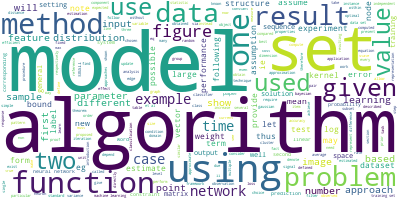

In [15]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [17]:
# Write your code here
#import modules
import os
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('/content/papers .csv')
# Print head
papers.head()






,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


Since the goal of this analysis is to perform topic modeling, let’s focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we’ll only look at 100 papers

In [18]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
6159,2016,Exponential Family Embeddings,Word embeddings are a powerful approach to cap...,Exponential Family Embeddings\n\nMaja Rudolph\...
5128,2015,"Parallel Multi-Dimensional LSTM, With Applicat...",Convolutional Neural Networks (CNNs) can be sh...,"Parallel Multi-Dimensional LSTM, With Applicat..."
3951,2012,Near-Optimal MAP Inference for Determinantal P...,Determinantal point processes (DPPs) have rece...,Near-Optimal MAP Inference\nfor Determinantal ...
3327,2010,Using body-anchored priors for identifying act...,This paper presents an approach to the visual ...,Using body-anchored priors for identifying act...
2413,1990,Dynamics of Learning in Recurrent Feature-Disc...,Abstract Missing,Dynamics of Learning in Recurrent\nFeature-Dis...


Next, let’s perform a simple preprocessing on the content of paper_text column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [19]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-19-7a1a7a1d4347>:4: DeprecationWarning: invalid escape sequence \.
  papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))


6159    exponential family embeddings\n\nmaja rudolph\...
5128    parallel multi-dimensional lstm with applicati...
3951    near-optimal map inference\nfor determinantal ...
3327    using body-anchored priors for identifying act...
2413    dynamics of learning in recurrent\nfeature-dis...
Name: paper_text_processed, dtype: object

To verify whether the preprocessing, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model

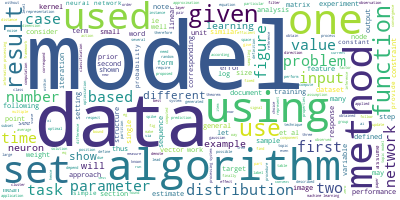

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

In [22]:
!pip install lda2vec

  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14433 sha256=e760db284447c327fe186a99cf292fce1045835731bbff70a9863bcac947e0e1
  Stored in directory: /root/.cache/pip/wheels/76/51/1c/1e2960ded8d6e14b14454493fcc9c2d879a7fb99421867f177
Successfully built lda2vec


Here we can use very recent version of pyLDAvis to use the lda2vec outputs. As of this writing, 16 or this commit 14e7b5f60d8360eb84969f3f08a1b77b365a5878e should work. You can do this quickly by installing it directly from master like so

In [23]:
import pyLDAvis
pyLDAvis.enable_notebook()

Now aftwrunnning lda2vec_run.py script in examples/twenty_newsgroups/lda2vec directory a topics.pyldavis.npz will be created that contains the topic-to-word probabilities and frequencies.

In [ ]:
npz = np.load(open('topics.pyldavis.npz', encoding='bytes'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print (msg)
    topic_to_topwords[j] = top_words

Topic 0 x11r5 xv window xterm server motif font xlib // sunos
Topic 1 jesus son father matthew sin mary g'd disciples christ sins
Topic 2 s1 nsa s2 clipper chip administration q escrow private sector serial number encryption technology
Topic 3 leafs games playoffs hockey game players pens yankees bike phillies
Topic 4 van - 0 pp en 1 njd standings 02 6
Topic 5 out_of_vocabulary out_of_vocabulary anonymity hiv homicide adl ripem bullock encryption technology eff
Topic 6 hiv magi prof erzurum venus van 2.5 million ankara satellite launched
Topic 7 nsa escrow clipper chip encryption government phones warrant vat

In [ ]:

import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')
 

In [ ]:
from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
texts = fetch_20newsgroups(subset='train', remove=remove).data

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

In [ ]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][1]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text)

03% in topic 00 which has top words x11r5, xv, window, xterm, server, motif, font, xlib, //, sunos
03% in topic 03 which has top words leafs, games, playoffs, hockey, game, players, pens, yankees, bike, phillies
22% in topic 08 which has top words mac, controller, shipping, disk, printer, mb, ethernet, enable, os/2, port
41% in topic 13 which has top words mac, i, thanks, monitor, apple, upgrade, card, connect, using, windows

In [ ]:
plt.bar(np.arange(20), dat['doc_topic_dists'][1])

<Container object of 20 artists>


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [29]:
# Write your code here
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']





 We set language to english since our documents are in the English language. If you would like to use a multi-lingual model, please use language="multilingual" instead.

We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model.

In [33]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2022-04-04 04:45:37,274 - BERTopic - Transformed documents to Embeddings
2022-04-04 04:46:26,400 - BERTopic - Reduced dimensionality with UMAP
2022-04-04 04:46:58,555 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [31]:
!pip install bertopic

     |████████████████████████████████| 57 kB 3.9 MB/s 
     |████████████████████████████████| 5.2 MB 39.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 3.8 MB 54.6 MB/s 
     |████████████████████████████████| 1.2 MB 40.3 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 6.5 MB 37.9 MB/s 
     |████████████████████████████████| 895 kB 9.7 MB/s 
     |████████████████████████████████| 636 kB 59.0 MB/s 
     |████████████████████████████████| 1.1 MB 66.3 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330781 sha256=30e438077ececd53ea9093588298448a84d701289f1162adbb43b26088eab92d
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4

After fitting our model, we can start by looking at the results. Typically, we look at the most frequent topics first as they best represent the collection of documents.

In [34]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,6277,-1_to_is_the_and
1,0,1822,0_game_team_he_games
2,1,603,1_key_clipper_chip_encryption
3,2,532,2_ites_hello_cheek_hi
4,3,462,3_israel_israeli_jews_arab


In [35]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,6277,-1_to_is_the_and
1,0,1822,0_game_team_he_games
2,1,603,1_key_clipper_chip_encryption
3,2,532,2_ites_hello_cheek_hi
4,3,462,3_israel_israeli_jews_arab


Topic	Count	Name
0	-1	8633	-1_file_use_any_me
1	0	828	0_jesus_bible_faith_christ
2	1	708	1_space_nasa_orbit_spacecraft
3	2	625	2_game_hockey_nhl_leafs
4	3	600	3_baseball_pitching_pitcher_cubs

In [36]:
topic_model.get_topic(0)  # Select the most frequent topic

[('game', 0.010880689040568695),
 ('team', 0.009443245562885864),
 ('he', 0.0075928853132876195),
 ('games', 0.007508568200916502),
 ('players', 0.006566398058969572),
 ('season', 0.006468558302277777),
 ('hockey', 0.006362136617005911),
 ('play', 0.006030413617212302),
 ('25', 0.005922561719615104),
 ('year', 0.005902749055764073)]

After having trained our BERTopic model, we can iteratively go through perhaps a hundred topic to get a good understanding of the topics that were extract. However, that takes quite some time and lacks a global representation. Instead, we can visualize the topics that were generated in a way very similar to LDAvis:

In [37]:
topic_model.visualize_topics()

In [38]:
topic_model.visualize_term_rank()

When you have trained a model and viewed the topics and the words that represent them, you might not be satisfied with the representation. Perhaps you forgot to remove stopwords or you want to try out a different n_gram_range. We can use the function update_topics to update the topic representation with new parameters for c-TF-IDF

In [41]:
topic_model.update_topics(docs, topics, n_gram_range=(1, 2))

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.


For all cases, the similar documents are more apparent in the top and bottom groups of100 patent documents.
 The fact that both methods agree on the most and least similar documents can help designers to look at the two groups for near-field or far-field
analogies. Depending on the goal of the designer, they can analyze similar documents or dissimilar documents during design ideationIn LDA, the two probability distributions, p(z|d) and p(w|z), are assumed to be multinomial distributions. Thus, the topic distributions in all documents share the common Dirichlet prior αα, and the word distributions of topics share the common Dirichlet prior ηη. Given the parameters αα and ηη for document d, parameter θ d of a multinomial distribution over K topics is constructed from Dirichlet distribution Dir(θ d |α). 
Similarly, for topic k, parameter β k of a multinomial distribution over V words is derived from Dirichlet distribution Dir(β k |η). As a conjugate prior for the multinomial, the Dirichlet distribution is a convenient choice as a prior and can simplify the statistical inference in LDA. Therefore, in PLSA, by contrast, any common prior probability distribution was not specified for p(z|d) andp(w|z). Naturally, there are no αα and ηη in the generative process of LSA.
As an unsupervised learning model, LDA can discover underlying topics in unlabeled data. Nevertheless, “topics” discovered in an unsupervised way may not match the true topics in the data. Therefore, many researchers modified LDA in a supervised learning manner, which can introduce known label information into the topic discovery process.

The typical supervised topic models include supervised LDA  the discriminative variation on LDA (discLDA), and maximum entropy discrimination LDA (medLDA) (Zhu et al. 2012). For example, SLDA associates each document with an observable continuous response variable, and models the response variables using normal linear regression. A multilabel topic model called labeled LDA (LLDA) (Ramage et al. 2009) extends previous supervised models to allow for multiple labels of documents, and the relation of labels to topics represents one-to-one mapping. Partially labeled LDA (PLLDA) (Ramage et al. 2011) further extends LLDA to have latent topics not present in the document labels.
lda2vec specifically builds on top of the skip-gram model of word2vec to generate word vectors. If you’re not familiar with skip-gram and word2vec, you can read up on it here, but essentially it’s a neural net that learns a word embedding by trying to use the input word to predict surrounding context words.

